In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
	return 1/(1 + np.exp(-z))

# Produce a neural network randomly initialized
def initialize_parameters(n_x, n_h, n_y):
	W1 = np.random.randn(n_h, n_x)
	b1 = np.zeros((n_h, 1))
	W2 = np.random.randn(n_y, n_h)
	b2 = np.zeros((n_y, 1))

	parameters = {
	"W1": W1,
	"b1" : b1,
	"W2": W2,
	"b2" : b2
	}
	return parameters

# Evaluate the neural network
def forward_prop(X, parameters):
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  # Z value for Layer 1
  Z1 = np.dot(W1, X) + b1
  # Activation value for Layer 1
  A1 = np.tanh(Z1)
  # Z value for Layer 2
  Z2 = np.dot(W2, A1) + b2
  # Activation value for Layer 2
  A2 = sigmoid(Z2)

  cache = {
    "A1": A1,
    "A2": A2
  }
  return A2, cache

# Evaluate the error (i.e., cost) between the prediction made in A2 and the provided labels Y 
# We use the Mean Square Error cost function
def calculate_cost(A2, Y):
  # m is the number of examples
  cost = np.sum((0.5 * (A2 - Y) ** 2).mean(axis=1))/m
  return cost

# Apply the backpropagation
def backward_prop(X, Y, cache, parameters):
  A1 = cache["A1"]
  A2 = cache["A2"]

  W2 = parameters["W2"]

  # Compute the difference between the predicted value and the real values
  dZ2 = A2 - Y
  dW2 = np.dot(dZ2, A1.T)/m
  db2 = np.sum(dZ2, axis=1, keepdims=True)/m
  # Because d/dx tanh(x) = 1 - tanh^2(x)
  dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1, 2))
  dW1 = np.dot(dZ1, X.T)/m
  db1 = np.sum(dZ1, axis=1, keepdims=True)/m

  grads = {
    "dW1": dW1,
    "db1": db1,
    "dW2": dW2,
    "db2": db2
  }

  return grads

# Third phase of the learning algorithm: update the weights and bias
def update_parameters(parameters, grads, learning_rate):
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  dW1 = grads["dW1"]
  db1 = grads["db1"]
  dW2 = grads["dW2"]
  db2 = grads["db2"]

  W1 = W1 - learning_rate*dW1
  b1 = b1 - learning_rate*db1
  W2 = W2 - learning_rate*dW2
  b2 = b2 - learning_rate*db2
  
  new_parameters = {
    "W1": W1,
    "W2": W2,
    "b1" : b1,
    "b2" : b2
  }

  return new_parameters

# model is the main function to train a model
# X: is the set of training inputs
# Y: is the set of training outputs
# n_x: number of inputs (this value impacts how X is shaped)
# n_h: number of neurons in the hidden layer
# n_y: number of neurons in the output layer (this value impacts how Y is shaped)
def model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate):
  c=[]
  ite=[]
  parameters = initialize_parameters(n_x, n_h, n_y)
  for i in range(0, num_of_iters+1):
    a2, cache = forward_prop(X, parameters)
    cost = calculate_cost(a2, Y)
    c.append(cost)
    ite.append(i)
    grads = backward_prop(X, Y, cache, parameters)
    parameters = update_parameters(parameters, grads, learning_rate)
    #if(i%100 == 0):
      #print('Cost after iteration# {:d}: {:f}'.format(i, cost))
  # Plot Loss function
  
  plt.figure(figsize = (14,7))
  plt.plot(ite,c)
  plt.title("Cost during Training")
  plt.xlabel("Iterations")
  plt.ylabel("Cost")
  return parameters

# Make a prediction
# X: represents the inputs
# parameters: represents a model
# the result is the prediction
def predict(X, parameters):
  a2, cache = forward_prop(X, parameters)
  yhat = a2
  yhat = np.squeeze(yhat)
  if(yhat >= 0.5):
    y_predict = 1
  else:
    y_predict = 0

  return y_predict



Neural Network prediction for example (0, 0) is 0
Neural Network prediction for example (0, 1) is 1
Neural Network prediction for example (1, 0) is 1
Neural Network prediction for example (1, 1) is 0


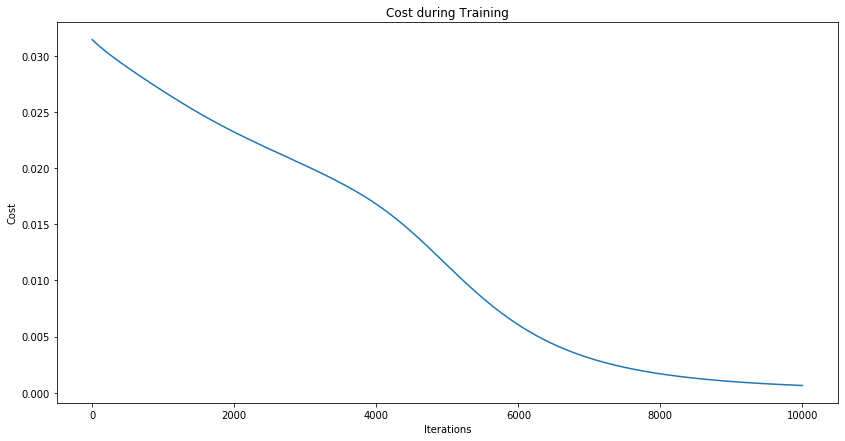

In [2]:
# Set the seed to make result reproducible
np.random.seed(42)

# The 4 training examples by columns
X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]])

# The outputs of the XOR, OR, AND and NAND for every example in X
Y_XOR = np.array([[0, 1, 1, 0]])
Y_OR = np.array([[0, 1, 1, 1]])
Y_AND = np.array([[0, 0, 0, 1]])
Y_NAND = np.array([[1, 1, 1, 0]])


# No. of training examples
m = X.shape[1]

# Set the hyperparameters
n_x = 2     #No. of neurons in first layer
n_h = 4     #No. of neurons in hidden layer
n_y = 1     #No. of neurons in output layer

#The number of times the model has to learn the dataset
number_of_iterations = 10000
learning_rate = 0.01

# define a model 
trained_parameters_XOR = model(X, Y_XOR, n_x, n_h, n_y, number_of_iterations, learning_rate)


# Test 2X1 vector to calculate the XOR of its elements. 
# You can try any of those: (0, 0), (0, 1), (1, 0), (1, 1)
X_test = np.array([[[0], [0]],[[0], [1]],[[1], [0]],[[1], [1]]])



# Print the result
for i in range(0,4):
    
    y_predict_XOR = predict(X_test[i], trained_parameters_XOR)
    print('Neural Network prediction for example ({:d}, {:d}) is {:d}'.format(
        X_test[i][0][0], X_test[i][1][0], y_predict_XOR))


Neural Network prediction for example (0, 0) is 0
Neural Network prediction for example (0, 1) is 1
Neural Network prediction for example (1, 0) is 1
Neural Network prediction for example (1, 1) is 1


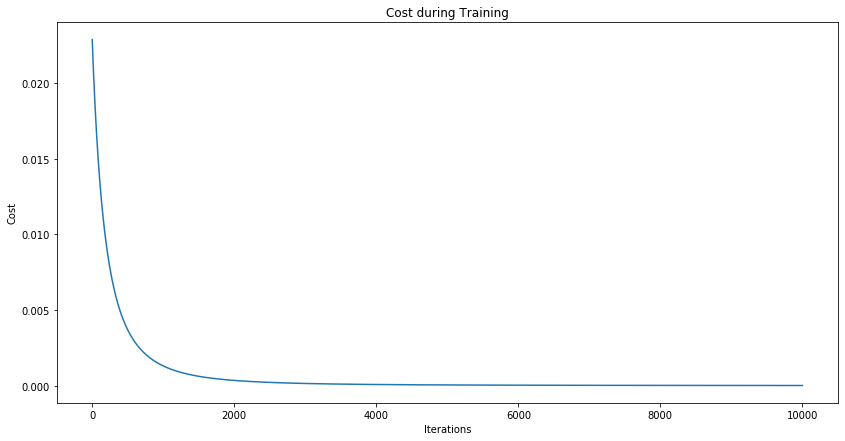

In [3]:
trained_parameters_OR = model(X, Y_OR, n_x, n_h, n_y, number_of_iterations, learning_rate)
for i in range(0,4):
    
    y_predict_OR = predict(X_test[i], trained_parameters_OR)
    print('Neural Network prediction for example ({:d}, {:d}) is {:d}'.format(
        X_test[i][0][0], X_test[i][1][0], y_predict_OR))


Neural Network prediction for example (0, 0) is 0
Neural Network prediction for example (0, 1) is 0
Neural Network prediction for example (1, 0) is 0
Neural Network prediction for example (1, 1) is 1


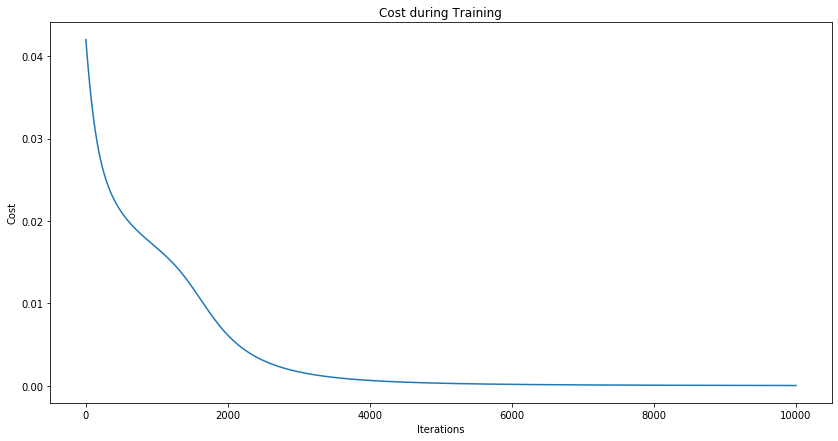

In [4]:
trained_parameters_AND = model(X, Y_AND, n_x, n_h, n_y, number_of_iterations, learning_rate)
for i in range(0,4):
    y_predict_AND = predict(X_test[i], trained_parameters_AND)
    print('Neural Network prediction for example ({:d}, {:d}) is {:d}'.format(
        X_test[i][0][0], X_test[i][1][0], y_predict_AND))

Neural Network prediction for example (0, 0) is 1
Neural Network prediction for example (0, 1) is 1
Neural Network prediction for example (1, 0) is 1
Neural Network prediction for example (1, 1) is 0


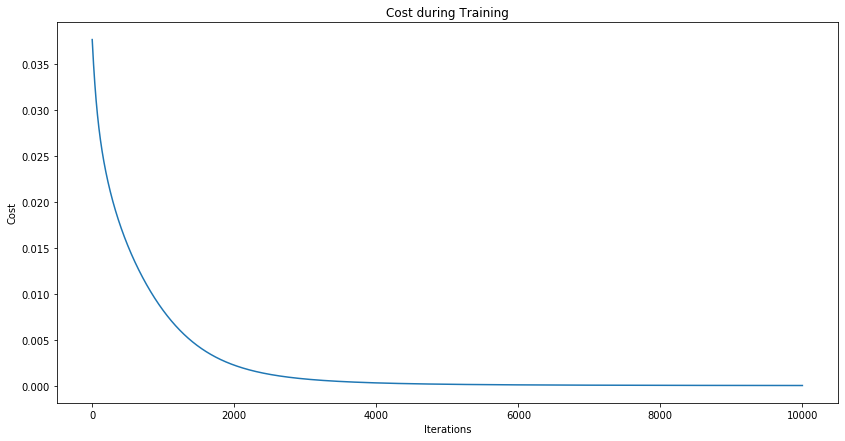

In [5]:
trained_parameters_NAND = model(X, Y_NAND, n_x, n_h, n_y, number_of_iterations, learning_rate)
for i in range(0,4):
    y_predict_NADN = predict(X_test[i], trained_parameters_NAND)
    print('Neural Network prediction for example ({:d}, {:d}) is {:d}'.format(
        X_test[i][0][0], X_test[i][1][0], y_predict_NADN))

In [6]:
m

4